<a href="https://colab.research.google.com/github/Mohan-this-side/Hackathon_NEU/blob/main/GBC_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
train =pd.read_csv("/content/drive/MyDrive/Hackathon_NEU/stay-or-stray/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Hackathon_NEU/stay-or-stray/test.csv")

Training with top20 feature (Accuracy : 88)

Accuracy of the Gradient Boosting classifier: 0.88


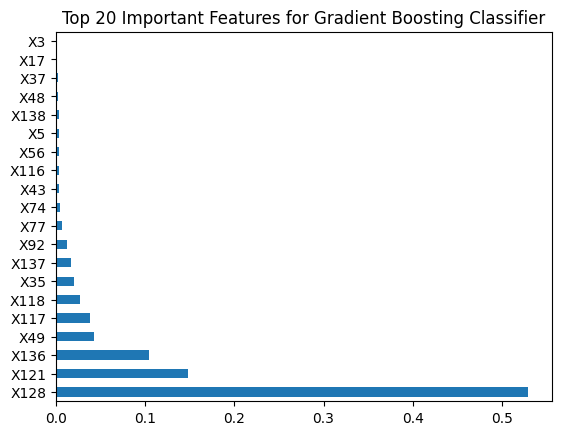

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# The rest of your code for loading and cleaning the data remains the same.
train_clean = train.dropna(subset=['label'])

# Separate features and target variable after dropping NaN in target
#X = train_clean.drop(['label', 'ID'], axis=1) #features

#top20_f= feature_importances.nlargest(20).index

X = train_clean.drop(['label','ID'],axis=1)
y = train_clean['label']              #target

# Initialize the SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform the dataset
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back into a DataFrame (useful for further operations)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on your training data
gbc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = gbc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of the Gradient Boosting classifier: {accuracy:.2f}")

# Plot feature importances
feature_importances = pd.Series(gbc.feature_importances_, index=X_train.columns)
top20_f= feature_importances.nlargest(20).index
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Important Features for Gradient Boosting Classifier')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      5224
           1       0.89      0.96      0.92     20090

    accuracy                           0.88     25314
   macro avg       0.84      0.76      0.79     25314
weighted avg       0.87      0.88      0.87     25314



In [ ]:
print(feature_importances.nlargest(20).index)

Index(['X128', 'X121', 'X136', 'X49', 'X117', 'X118', 'X35', 'X137', 'X92',
       'X77', 'X74', 'X43', 'X116', 'X56', 'X5', 'X138', 'X48', 'X37', 'X17',
       'X3'],
      dtype='object')


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
gbc = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring=make_scorer(accuracy_score), n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_imputed_df[top20_f], y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.2f}")


## Cross Validation:

The average of cross-validation (CV) scores from a 5-fold CV provides a more generalized estimate of the model's performance across different subsets of the training data, reducing the impact of the variance within a single train-test split. This method helps mitigate overfitting by ensuring the model's robustness across various data samples. On the other hand, the accuracy calculated on the original training data (or a single split of it) might not fully represent the model's ability to generalize to new, unseen data, as it reflects the model's performance on a specific set of data. Hence, while the two metrics can sometimes give similar results, the average CV score is typically a more reliable indicator of model performance on unseen data.

[0.87639251 0.87431856 0.87721481 0.87828148 0.87437037]
Average CV score: 0.88


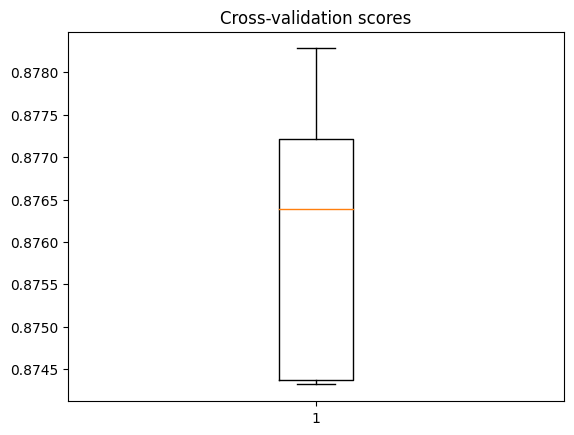

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ... Your data loading and cleaning code remains unchanged ...

# X and y are already defined in your code
# Impute missing values using SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gbc, X_imputed_df, y, cv=5)

# Print each cv score (accuracy) and average them
print(cv_scores)
print(f"Average CV score: {cv_scores.mean():.2f}")

# You can also plot the distribution of scores if you like
plt.boxplot(cv_scores)
plt.title('Cross-validation scores')
plt.show()


Confusion Matrix:
[[ 2908  2316]
 [  821 19269]]


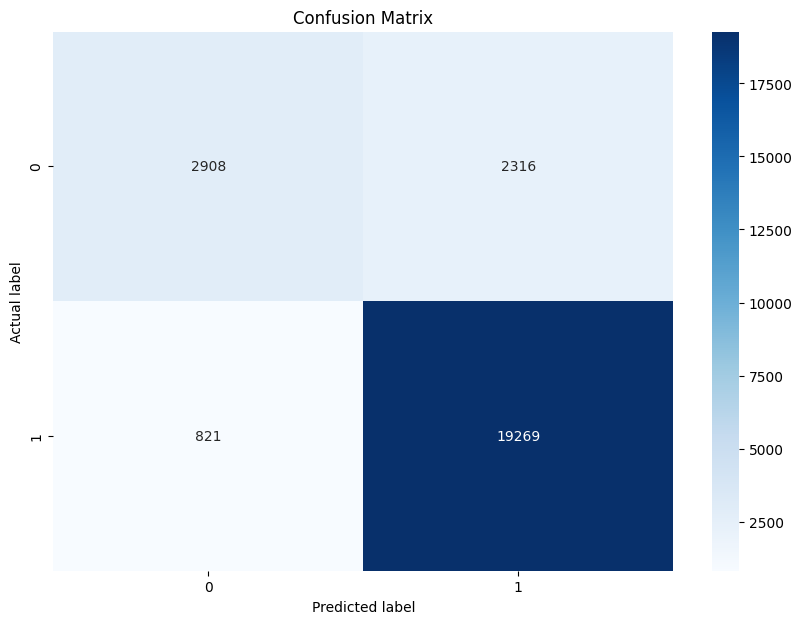

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the rest of your code is unchanged and comes before this

# Predict the labels for the test set
y_pred = gbc.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Training with Smoth function:

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_imputed_df, y)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X_imputed_df, y)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X_imputed_df, y)

print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(133776, 139) (133776,)
(133776, 139) (133776,)
(34978, 139) (34978,)


In [ ]:
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

1    66888
0    66888
Name: label, dtype: int64
1    66888
0    66888
Name: label, dtype: int64
0    17489
1    17489
Name: label, dtype: int64


## RandomUnderSampler:

Accuracy of the Gradient Boosting classifier after SMOTE: 0.92
Confusion Matrix:
[[11898  1361]
 [  777 12720]]


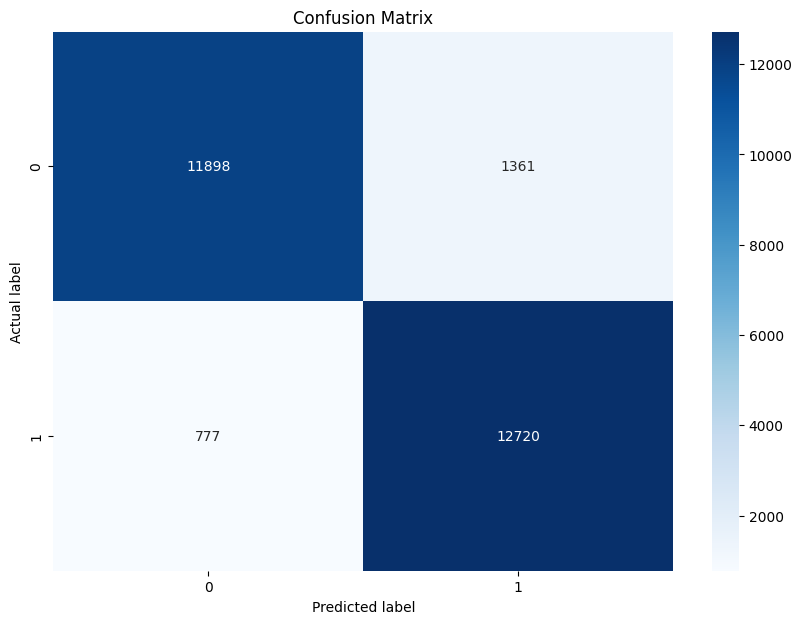

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ... Your data loading and cleaning code remains unchanged ...

# Selecting the top 20 features as per feature importances
#top20_f = feature_importances.nlargest(20).index
X = train_clean.drop(['label','ID'],axis=1)
y = train_clean['label']  # Target variable

# Initialize the SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform the dataset
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back into a DataFrame (useful for further operations)
X_imputed_df = pd.DataFrame(X_imputed)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the SMOTE-resampled training data
gbc.fit(X_train_smote, y_train_smote)

# Predict the labels for the test set
y_pred = gbc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of the Gradient Boosting classifier after SMOTE: {accuracy:.2f}")


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:

# Convert the 'ID' column from float to int
test['ID'] = test['ID'].astype(int)

# Separate out the 'ID' column and features from the 'test' dataset
test_features = test.drop('ID', axis=1)

# Impute the 'test' dataset using the fitted SimpleImputer
# Note: We use .transform() here, NOT .fit_transform()
test_imputed = imputer.transform(test_features)

# Predict the labels using the trained and tuned Random Forest model (best_grid)
predicted_labels = gbc.predict(test_imputed)

# Create a DataFrame with 'ID' and the predicted 'label'
results_df = pd.DataFrame({
    'ID': test['ID'],
    'label': predicted_labels
})

# Convert the 'ID' column to integer to match the original ID's format
results_df['ID'] = results_df['ID'].astype(int)

# Output the DataFrame with 'ID' and 'label'
# If you want to save to a CSV file:
results_df.to_csv('/content/drive/MyDrive/Hackathon_NEU/my_submission_11_gbc_SM.csv', index=False)

# If you want to display the first few rows of the DataFrame
print(results_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


       ID  label
0   17547      0
1  140449      1
2  182658      1
3  149652      1
4  106304      1
